In [ ]:
!unzip /content/drive/MyDrive/chest_xray.zip
!unzip /content/drive/MyDrive/COVID.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: COVID/COVID-3264.png    
  inflating: __MACOSX/COVID/._COVID-3264.png  
  inflating: COVID/COVID-1473.png    
  inflating: __MACOSX/COVID/._COVID-1473.png  
  inflating: COVID/COVID-2393.png    
  inflating: __MACOSX/COVID/._COVID-2393.png  
  inflating: COVID/COVID-1842.png    
  inflating: __MACOSX/COVID/._COVID-1842.png  
  inflating: COVID/COVID-719.png     
  inflating: __MACOSX/COVID/._COVID-719.png  
  inflating: COVID/COVID-1856.png    
  inflating: __MACOSX/COVID/._COVID-1856.png  
  inflating: COVID/COVID-3099.png    
  inflating: __MACOSX/COVID/._COVID-3099.png  
  inflating: COVID/COVID-2387.png    
  inflating: __MACOSX/COVID/._COVID-2387.png  
  inflating: COVID/COVID-725.png     
  inflating: __MACOSX/COVID/._COVID-725.png  
  inflating: COVID/COVID-731.png     
  inflating: __MACOSX/COVID/._COVID-731.png  
  inflating: COVID/COVID-2436.png    
  inflating: __MACOSX/COVID/._COVID-2436.png  
  inflating: COVID/COVID-1881.png    
  inflati

In [2]:
!unzip /content/pneumonia_model.h5py-20210629T042321Z-001.zip

Archive:  /content/pneumonia_model.h5py-20210629T042321Z-001.zip
   creating: pneumonia_model.h5py/assets/
  inflating: pneumonia_model.h5py/saved_model.pb  
  inflating: pneumonia_model.h5py/keras_metadata.pb  
  inflating: pneumonia_model.h5py/variables/variables.index  
  inflating: pneumonia_model.h5py/variables/variables.data-00000-of-00001  


In [ ]:
# random choose numbers of file and move to new folder
import os, random, shutil

def copyFile(fileDir):
  # 1
  pathDir = os.listdir(fileDir)
  # 2
  sample = random.sample(pathDir, 10)
  print(sample[:10])
  print('Moving the items...')
  # 3
  for name in sample:
    shutil.move(fileDir+name, tarDir+name)
  print('Complete!')
if __name__ == '__main__':
	fileDir = "/content/COVID/"
	tarDir = '/content/COVID_val/'
	copyFile(fileDir)

['COVID-955.png', 'COVID-2465.png', 'COVID-3567.png', 'COVID-261.png', 'COVID-2739.png', 'COVID-2611.png', 'COVID-410.png', 'COVID-2008.png', 'COVID-1806.png', 'COVID-3356.png']
Moving the items...
Complete!


In [ ]:
shutil.rmtree('/content/chest_xray/test/.ipynb_checkpoints')

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/chest_xray/train/',
        target_size=(64, 64),
        batch_size=64,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        '/content/chest_xray/test/',
        target_size=(64, 64),
        batch_size=64,
        class_mode='categorical')
print(validation_generator.class_indices)

FileNotFoundError: ignored

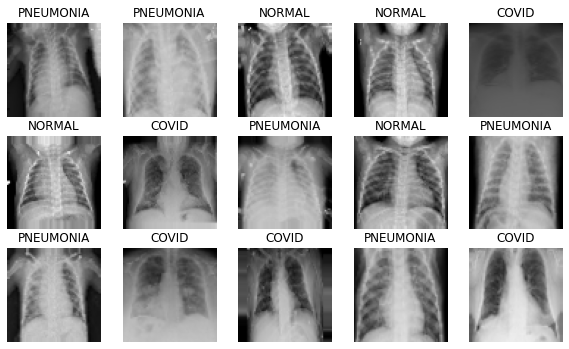

In [ ]:
image_batch, label_batch = next(iter(train_generator))
# print(image_batch[0].shape)
# print(label_batch[1])
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(15):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        class_no = tf.argmax(label_batch[n], axis=0)
        if class_no==2:
            plt.title("PNEUMONIA")
        elif class_no==1:
            plt.title("NORMAL")
        elif class_no==0:
            plt.title("COVID")
        else:
            plt.title("error")
        plt.axis("off")

show_batch(image_batch, label_batch)

In [ ]:
train_generator.image_shape 

(64, 64, 3)

In [ ]:
train_generator.class_indices 

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
EPOCHS = 20
INIT_LR = 1e-3 
BS = 15 
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

In [ ]:
input_shape=(None,64,64,3)

In [ ]:

model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.build(input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_32 (ModuleWra (None, 64, 64, 32)        896       
_________________________________________________________________
module_wrapper_33 (ModuleWra (None, 64, 64, 32)        9248      
_________________________________________________________________
module_wrapper_34 (ModuleWra (None, 32, 32, 32)        0         
_________________________________________________________________
module_wrapper_35 (ModuleWra (None, 32, 32, 64)        18496     
_________________________________________________________________
module_wrapper_36 (ModuleWra (None, 32, 32, 64)        36928     
_________________________________________________________________
module_wrapper_37 (ModuleWra (None, 16, 16, 64)        0         
_________________________________________________________________
module_wrapper_38 (ModuleWra (None, 16, 16, 128)      

In [ ]:
model.compile(loss='CategoricalCrossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.fit(
        train_generator,
        steps_per_epoch=82,
        epochs=200,
        validation_data=validation_generator,
        validation_steps=82)


Epoch 1/200
82/82 [==============================] - 47s 573ms/step - loss: 1.0192 - accuracy: 0.5177 - val_loss: 0.6706 - val_accuracy: 0.7357
Epoch 2/200
82/82 [==============================] - 40s 484ms/step - loss: 0.7372 - accuracy: 0.6994
Epoch 3/200
82/82 [==============================] - 40s 484ms/step - loss: 0.5796 - accuracy: 0.7689
Epoch 4/200
82/82 [==============================] - 40s 491ms/step - loss: 0.4759 - accuracy: 0.8000
Epoch 5/200
82/82 [==============================] - 40s 489ms/step - loss: 0.4452 - accuracy: 0.8382
Epoch 6/200
82/82 [==============================] - 39s 479ms/step - loss: 0.3918 - accuracy: 0.8613
Epoch 7/200
82/82 [==============================] - 40s 482ms/step - loss: 0.3492 - accuracy: 0.8803
Epoch 8/200
82/82 [==============================] - 39s 478ms/step - loss: 0.3375 - accuracy: 0.8847
Epoch 9/200
82/82 [==============================] - 40s 484ms/step - loss: 0.2924 - accuracy: 0.9006
Epoch 10/200
82/82 [====================

In [8]:
model = tf.keras.models.load_model('/content/pneumonia_model.h5py')
scores = model.evaluate(validation_generator)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

NameError: ignored

In [ ]:
model.save('pneumonia_model.h5py')

INFO:tensorflow:Assets written to: pneumonia_model.h5py/assets


INFO:tensorflow:Assets written to: pneumonia_model.h5py/assets


Possibility of covid 1.0
Possibility of normal 2.7842516571542692e-30
Possibility of pneumonia 1.0486623243799391e-16


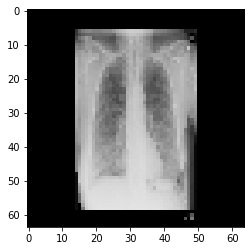

In [7]:
def predict_image(filename):
    img = load_img(filename, target_size=(64, 64))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,64,64,3)
    model = tf.keras.models.load_model('/content/pneumonia_model.h5py')
    prediction = model.predict(image)
    prediction = prediction.tolist()
    print(f'Possibility of covid {prediction[0][0]}')
    print(f'Possibility of normal {prediction[0][1]}')
    print(f'Possibility of pneumonia {prediction[0][2]}')
    plt.imshow(img)
    # if(prediction[0] > 0.5):
    #     stat = prediction[0] * 100 
    #     print("This image is %.2f percent %s"% (stat, "PNEUMONIA"))
    # else:
    #     stat = (1.0 - prediction[0]) * 100
    #     print("This image is %.2f percent %s" % (stat, "NORMAL"))

   
predict_image("/content/x-ray-COVID-19-1_1800000007267894.jpeg")